## Imports

In [1]:
import os
import sys
import librosa
import numpy as np
from scipy import signal
from librosa import display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Adding scripts to path
sys.path.append(os.getcwd().replace('notebooks', 'scripts'))
import notebook_utils as nou
import filters as fil

## 1. Basic Visualizing

In [2]:
desk_path = '../data/desk.wav'
worm_path = '../data/worms.wav'

Audio(desk_path)

In [3]:
desk_samples, desk_sr = librosa.load(desk_path, sr=None, mono=True, offset=0.0, duration=None)
worms_samples, worms_sr = librosa.load(worm_path, sr=None, mono=True, offset=0.0, duration=None)

print(f"{desk_path}: {len(desk_samples)/desk_sr:.2f}s with sampling rate of {desk_sr / 1e3}kHz.")
print(f"{worm_path}: {len(worms_samples)/worms_sr:.2f}s with sampling rate of {worms_sr / 1e3}kHz.")

../data/desk.wav: 5.40s with sampling rate of 44.1kHz.
../data/worms.wav: 5.53s with sampling rate of 44.1kHz.


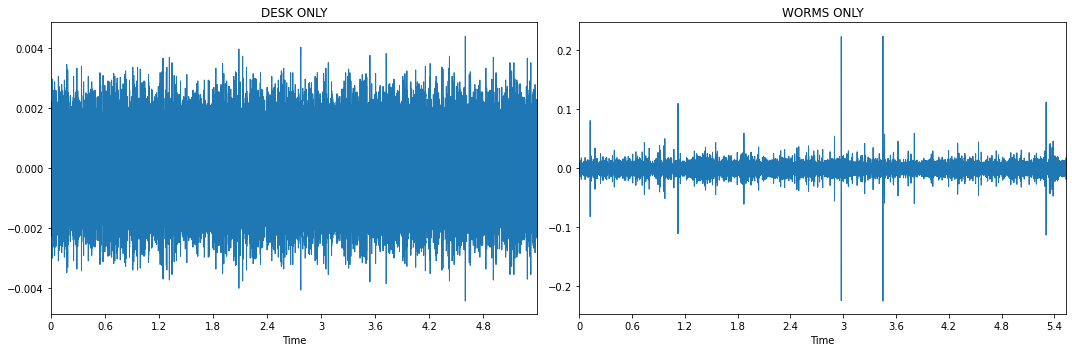

In [4]:
nou.compare_diagrams(
    librosa.display.waveplot, 
    sample_1=desk_samples, 
    sr_1=desk_sr,
    title_1="DESK ONLY",
    sample_2=worms_samples,
    sr_2=worms_sr,
    title_2="WORMS ONLY"
)

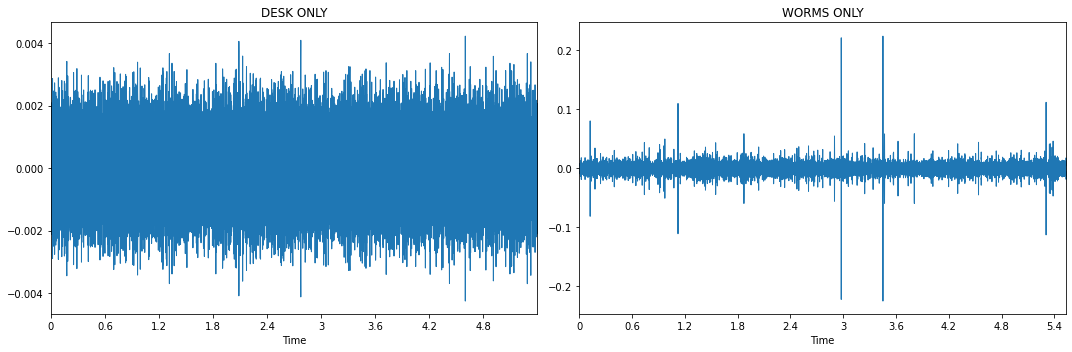

In [5]:
# cutoff freq
co = 10000
desk_filtered = fil.butterworth(desk_samples, desk_sr, btype='low', co=co)
worms_filtered = fil.butterworth(worms_samples, worms_sr, btype='low', co=co)

nou.compare_diagrams(
    librosa.display.waveplot, 
    sample_1=desk_filtered, 
    sr_1=desk_sr,
    title_1="DESK ONLY",
    sample_2=worms_filtered,
    sr_2=worms_sr,
    title_2="WORMS ONLY"
)

## 2. FFT

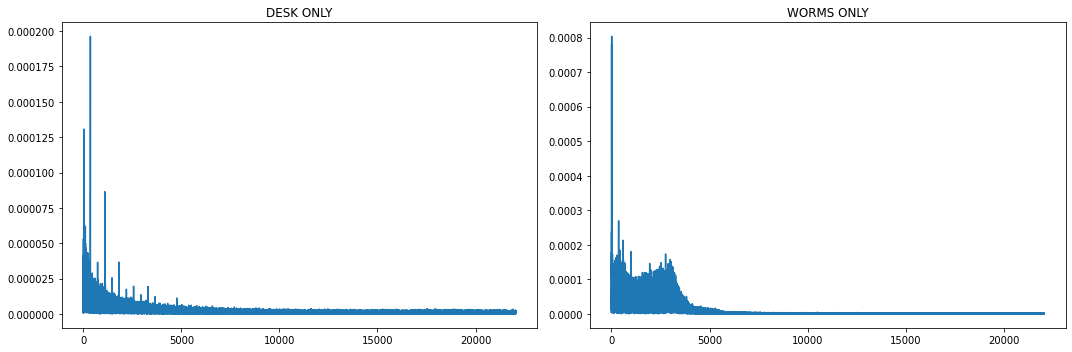

In [6]:
plt.figure(figsize=(15, 5))
fig1 = plt.subplot(1, 2, 1)
desk_x, desk_y = nou.plot_fft(desk_samples, desk_sr)
fig1.plot(desk_x, desk_y)
plt.title("DESK ONLY")

fig2 = plt.subplot(1, 2, 2)
worms_x, worms_y = nou.plot_fft(worms_samples, worms_sr)
fig2.plot(worms_x, worms_y)
plt.title("WORMS ONLY")

plt.tight_layout()

## 3. Spectograms

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Time [sec]')

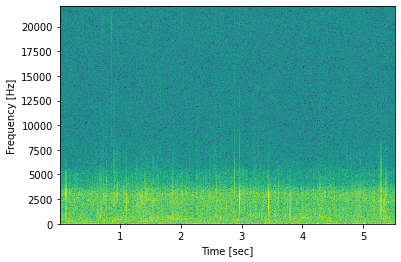

In [7]:
## SCIPY SPECGRAM
frequencies, times, spectrogram = signal.spectrogram(worms_samples,worms_sr,nfft=1024,noverlap=900, nperseg=1024)
plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

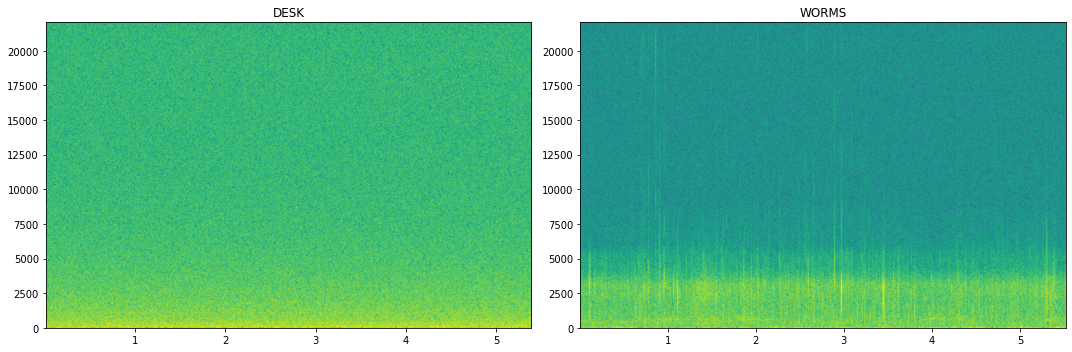

In [8]:
## MATPLOTLIB SPECGRAM
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
Pxx, freqs, bins, im = plt.specgram(desk_samples, NFFT=1024, Fs=desk_sr, noverlap=900)
plt.title("DESK")

plt.subplot(1, 2, 2)
Pxx, freqs, bins, im = plt.specgram(worms_samples, NFFT=1024, Fs=worms_sr, noverlap=900)
plt.title("WORMS")

plt.tight_layout()

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


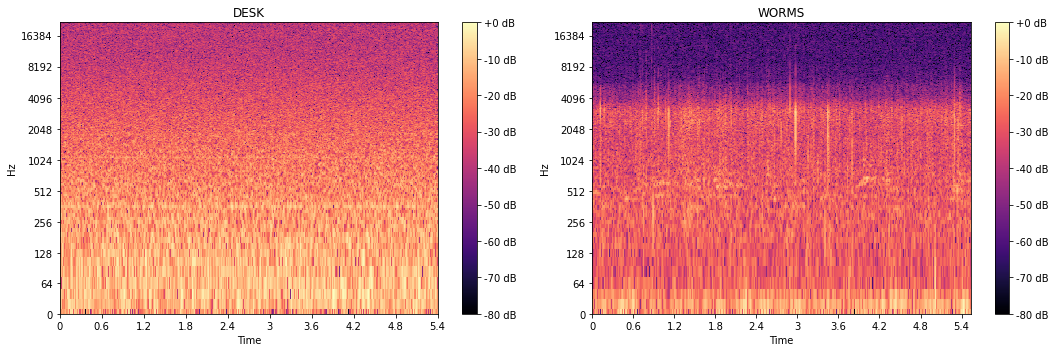

In [9]:
nou.compare_diagrams(
    nou.librosa_specgrams, 
    sample_1=desk_samples, 
    sr_1=desk_sr,
    title_1="DESK",
    sample_2=worms_samples,
    sr_2=worms_sr,
    title_2="WORMS"
)

### 3.1 Mel Scale Transformation

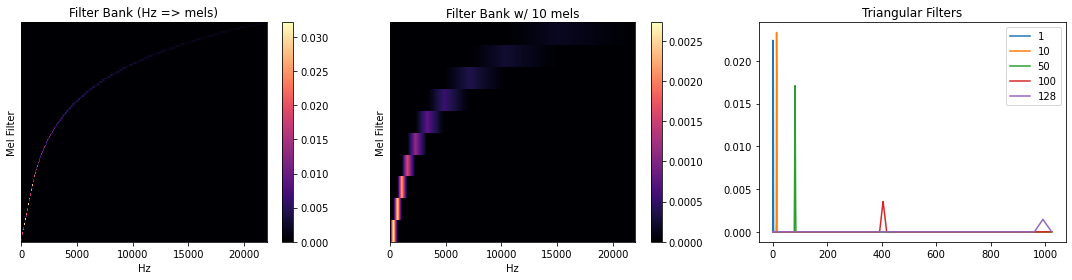

In [10]:
# just 4 understanding mel filters and their non-linear behaviour
nou.plot_mel_filters(worms_sr)

/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Lukas/miniconda3/envs/bed/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


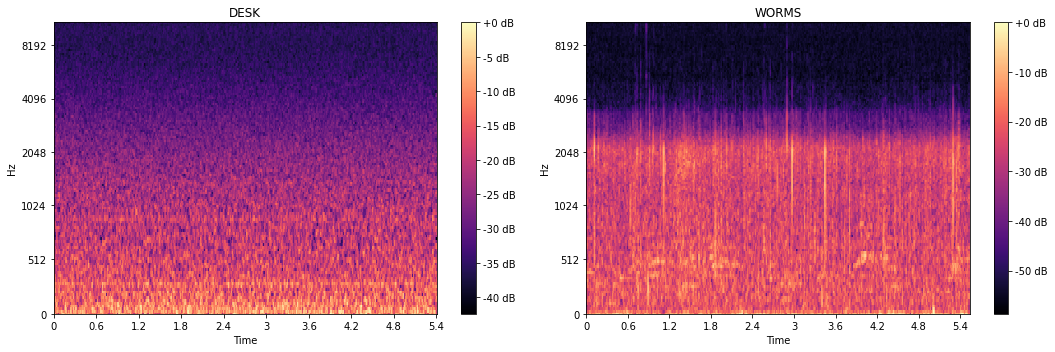

In [11]:
nou.compare_diagrams(
    nou.plot_mel, 
    sample_1=desk_samples, 
    sr_1=desk_sr,
    title_1="DESK",
    sample_2=worms_samples,
    sr_2=worms_sr,
    title_2="WORMS"
)

### 3.2 Test Run #2 with table

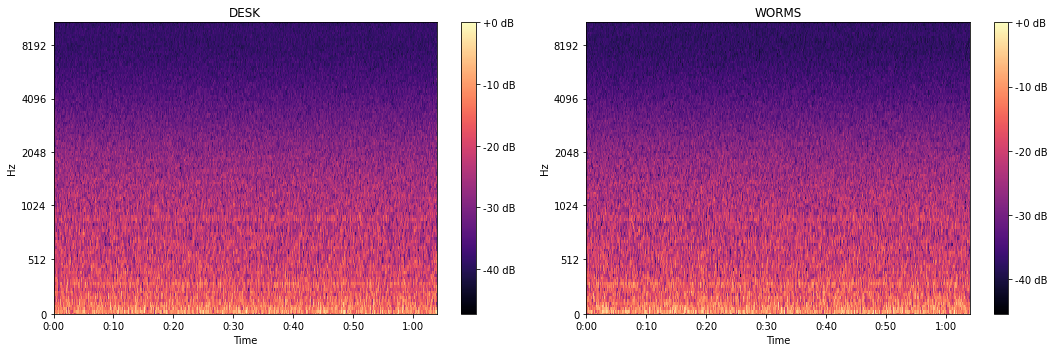

In [12]:
desk_p = '../data/Magnet_to_big_nail_desk.wav'
worm_p = '../data/Magnet_to_big_nail_worms.wav'

desk_samples, desk_sr = librosa.load(desk_p, sr=None, mono=True, offset=0.0, duration=None)
worms_samples, worms_sr = librosa.load(worm_p, sr=None, mono=True, offset=0.0, duration=None)

nou.compare_diagrams(
    nou.plot_mel, 
    sample_1=desk_samples, 
    sr_1=desk_sr,
    title_1="DESK",
    sample_2=worms_samples,
    sr_2=worms_sr,
    title_2="WORMS"
)

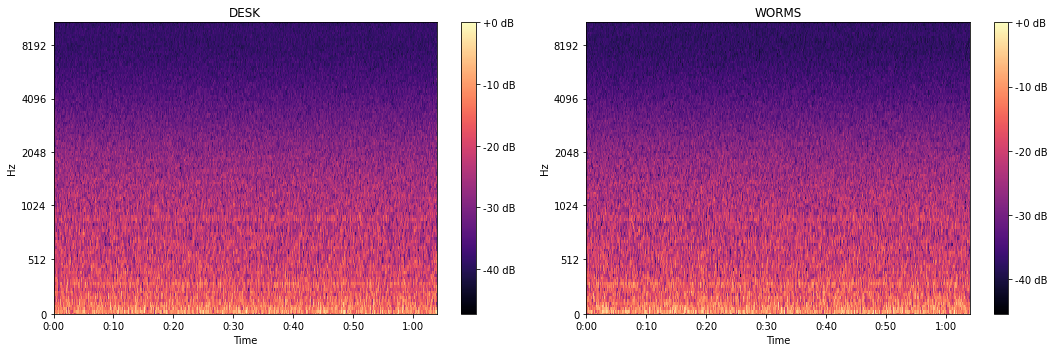

In [13]:
nou.compare_diagrams(
    nou.plot_mel, 
    sample_1=desk_samples, 
    sr_1=desk_sr,
    title_1="DESK",
    sample_2=worms_samples,
    sr_2=worms_sr,
    title_2="WORMS"
)